In [1]:
# Allows imports from modules in the project directory
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

CURRENT_DIRECTORY = Path(os.path.abspath('')).resolve()
MODULE_DIRECTORY = CURRENT_DIRECTORY.parent
PROJECT_DIRECTORY = MODULE_DIRECTORY.parents[1]
sys.path.extend([str(MODULE_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')

Python 3.9.19 (main, Jul  7 2024, 08:52:44) 
[Clang 15.0.0 (clang-1500.3.9.4)] on darwin


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

import utilities

2025-01-24 13:53:26.802712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
cts_wavelets = pywt.families(short=False)
print(cts_wavelets)

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [4]:
cts_wavelets = [
    'fbsp1-1.0-1.5', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan1.0-1.5'
]

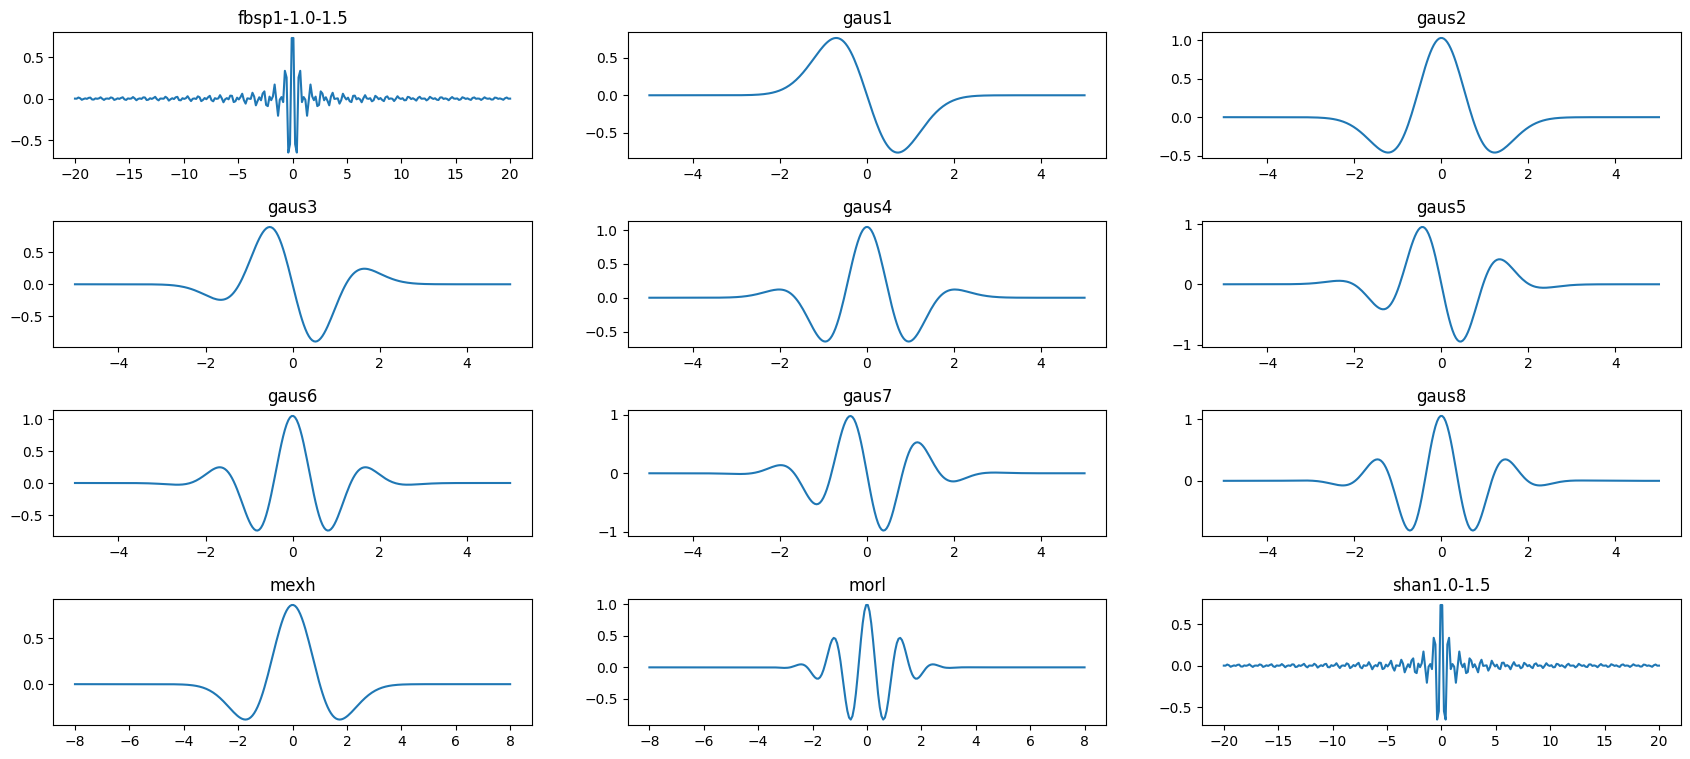

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(21, 9))
fig.subplots_adjust(hspace=0.5)
for i in range(4):
    for j in range(3):
        wavelet_name = cts_wavelets[i * 3 + j]
        wavelet = pywt.ContinuousWavelet(wavelet_name, dtype=np.float32)
        y, x = wavelet.wavefun(level=8)

        if y.dtype == np.complex64:
            y = np.real(y)

        ax[i, j].plot(x, y)
        ax[i, j].set(title=wavelet_name)

In [7]:
data, labels, fids, velocities, angles = utilities.load_dataset(MODULE_DIRECTORY / 'data/data_adp.pkl')

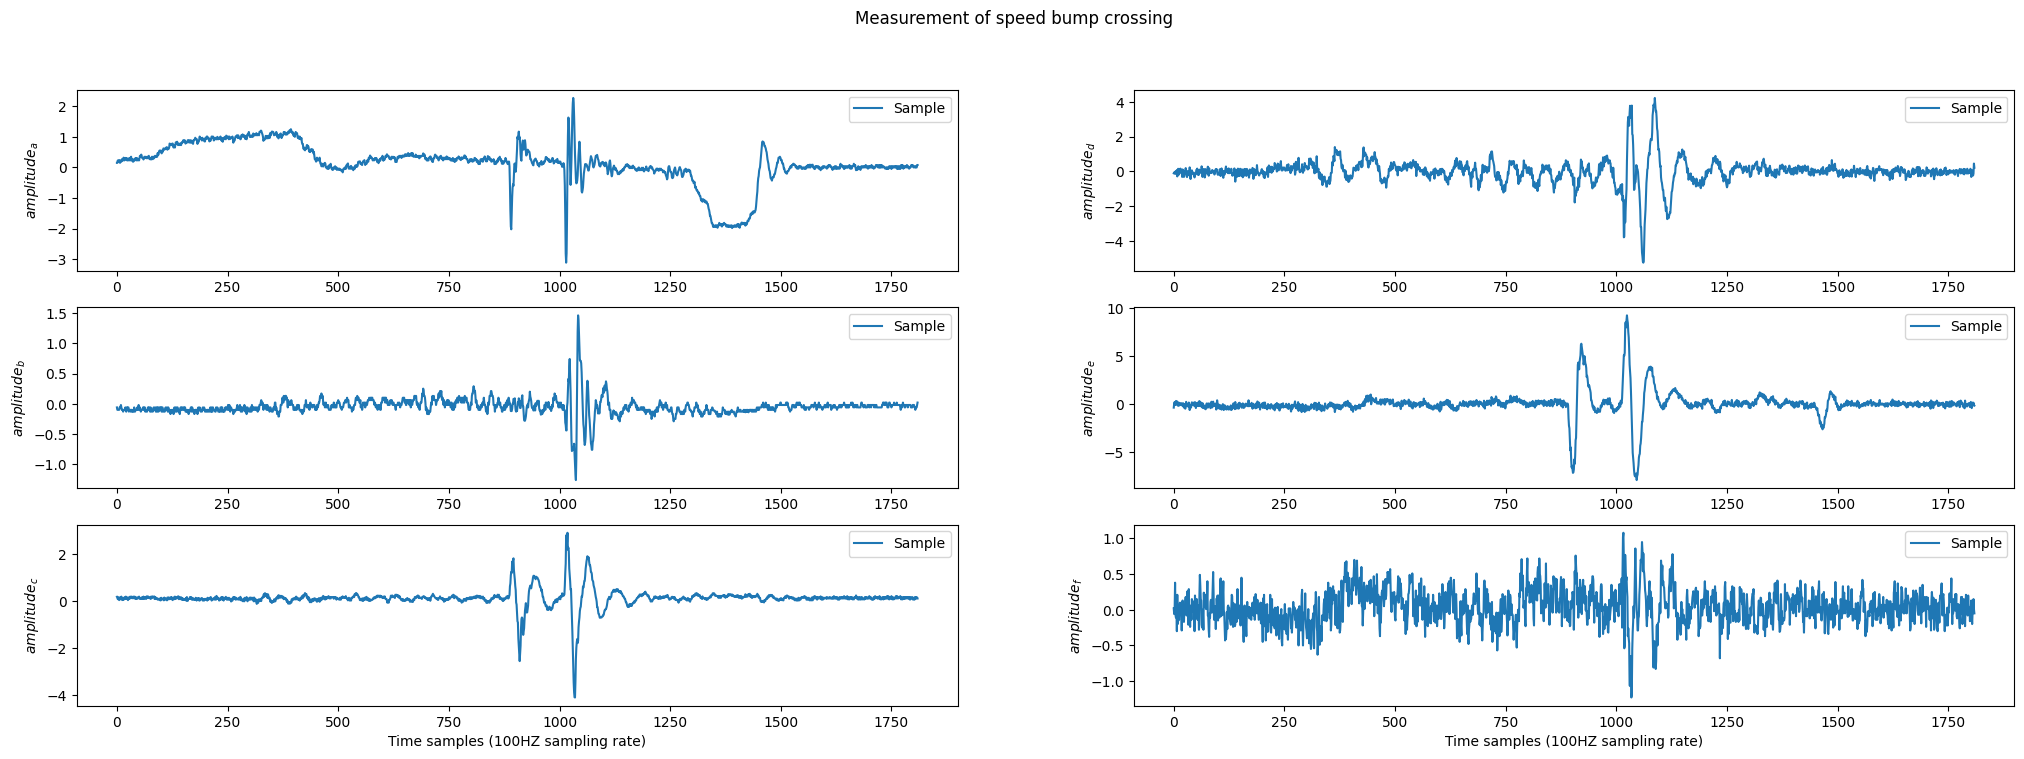

In [8]:
utilities.plot_sample(data[0])

In [9]:
def plot_cwt(signal, wavelet_name, number_of_scales):
    scales = np.exp(np.linspace(0, np.log(number_of_scales), number_of_scales))

    coefficients, _ = pywt.cwt(signal, scales, wavelet_name, 1)

    if coefficients.dtype == np.complex64:
        coefficients = np.real(coefficients)

    fig, ax = plt.subplots(figsize=(10, 5))
    plot = ax.matshow(np.log(np.abs(coefficients) + 1), interpolation='none', aspect='auto')
    fig.colorbar(plot)

    ax.set(title=f'Continuous Wavelet Transform: {wavelet_name} - {number_of_scales}')
    ax.set(xlabel='Time')
    ax.set(ylabel='Scales')
    ax.set_yticks(ticks=np.arange(0, number_of_scales)[::number_of_scales // 20], labels=scales.round(2)[::number_of_scales // 20])
    plt.show()

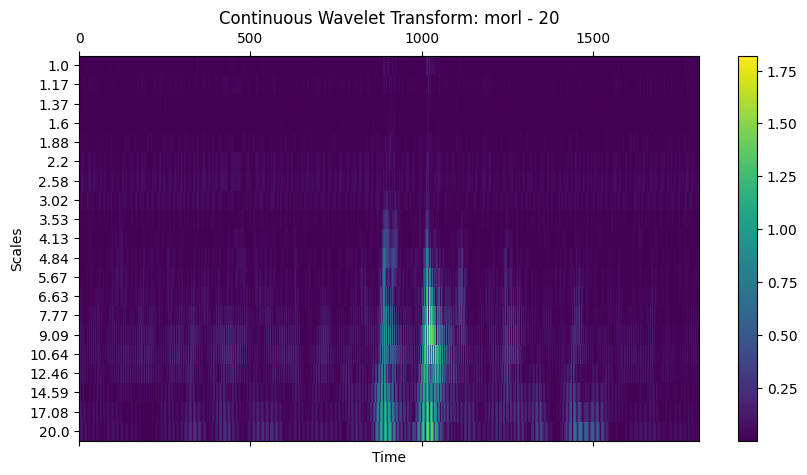

In [10]:
plot_cwt(data[0][:, 0], 'morl', 20)

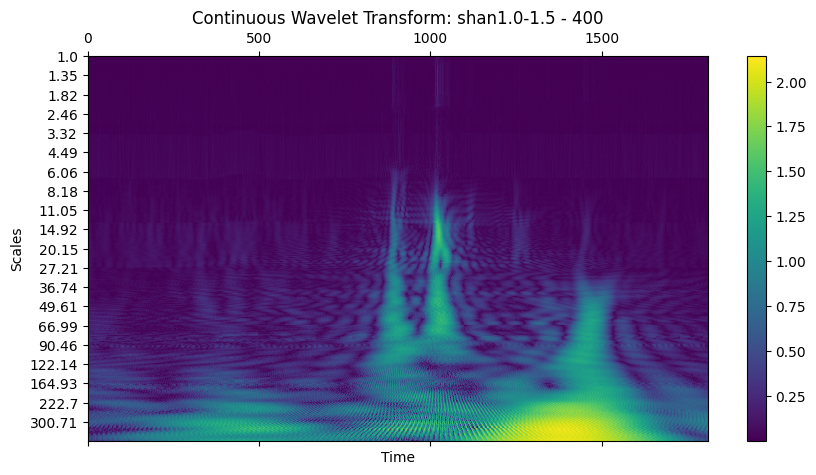

In [11]:
plot_cwt(data[0][:, 0], 'shan1.0-1.5', 400)

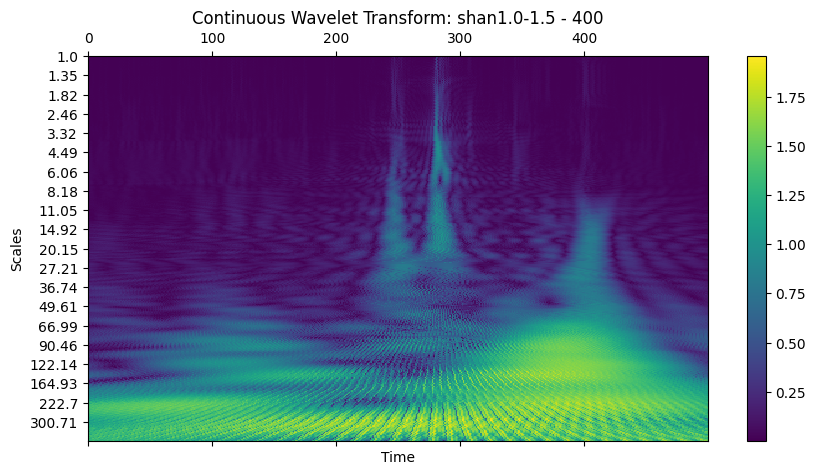

In [12]:
compression_size = 500
comp_sample = utilities.compress_sample(data[0], compression_size)

plot_cwt(comp_sample[:, 0], 'shan1.0-1.5', 400)

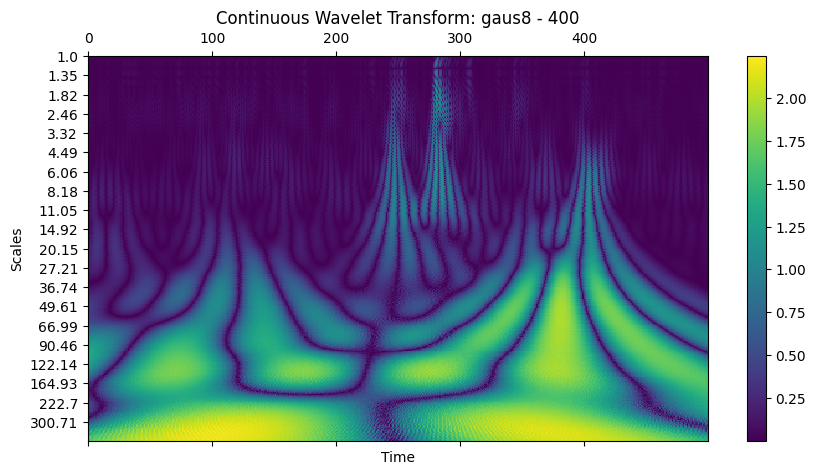

In [13]:
plot_cwt(comp_sample[:, 0], 'gaus8', 400)